In [968]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix


In [969]:
df = pd.read_csv("AIBL.csv")
df.head()

,APGEN1,APGEN2,CDGLOBAL,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH16SMOK,MH17MALI,MMSCORE,LIMMTOTAL,LDELTOTAL,DXCURREN,DXNORM,DXMCI,DXAD,PTGENDER,Examyear,APTyear,PTDOBYear
0,4,4,1.0,6.99,345.619,4.29,4.8,164,15.0,34.9,35.1,33.639,126.112,158.526,1.131,0,0,0,0,0,0,0,0,1,0,21,3,0.0,0,0,0,1,1,2007,2007,1925
1,4,3,0.5,1.51,585.520,4.42,3.2,250,15.0,33.9,34.8,21.625,86.477,154.660,0.905,0,0,1,1,1,0,0,0,0,1,28,10,0.0,0,0,1,0,1,2008,2008,1930
2,4,3,0.0,2.84,838.974,3.92,5.1,226,12.9,32.9,34.1,29.434,91.882,228.124,0.679,0,0,0,0,1,1,1,1,1,0,30,18,19.0,1,1,0,0,2,2008,2008,1941
3,3,3,0.0,2.01,521.817,4.15,5.0,258,13.7,33.1,34.3,33.038,90.080,146.927,1.131,0,0,1,0,0,0,0,0,1,0,30,14,14.0,1,1,0,0,1,2008,2008,1934
4,3,2,0.5,3.59,290.049,4.23,6.9,269,13.5,32.0,34.5,39.646,82.874,193.325,1.142,0,0,0,0,1,1,1,0,0,0,27,7,2.0,0,0,1,0,2,2012,2012,1929


In [970]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head()

,APGEN1,APGEN2,CDGLOBAL,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH16SMOK,MH17MALI,MMSCORE,LIMMTOTAL,LDELTOTAL,DXCURREN,DXNORM,DXMCI,DXAD,PTGENDER,Examyear,APTyear,PTDOBYear
0,4,4,1.0,6.99,345.619,4.29,4.8,164,15.0,34.9,35.1,33.639,126.112,158.526,1.131,0,0,0,0,0,0,0,0,1,0,21,3,0.0,0,0,0,1,1,2007,2007,1925
1,4,3,0.5,1.51,585.520,4.42,3.2,250,15.0,33.9,34.8,21.625,86.477,154.660,0.905,0,0,1,1,1,0,0,0,0,1,28,10,0.0,0,0,1,0,1,2008,2008,1930
2,4,3,0.0,2.84,838.974,3.92,5.1,226,12.9,32.9,34.1,29.434,91.882,228.124,0.679,0,0,0,0,1,1,1,1,1,0,30,18,19.0,1,1,0,0,2,2008,2008,1941
3,3,3,0.0,2.01,521.817,4.15,5.0,258,13.7,33.1,34.3,33.038,90.080,146.927,1.131,0,0,1,0,0,0,0,0,1,0,30,14,14.0,1,1,0,0,1,2008,2008,1934
4,3,2,0.5,3.59,290.049,4.23,6.9,269,13.5,32.0,34.5,39.646,82.874,193.325,1.142,0,0,0,0,1,1,1,0,0,0,27,7,2.0,0,0,1,0,2,2012,2012,1929


In [971]:
df.shape

(820, 36)

In [972]:
df[['DXNORM', 'DXMCI', 'DXAD']].sum()


DXNORM    592
DXMCI     133
DXAD       95
dtype: int64

In [973]:

# Create Label Column
df['DX'] = np.select(
    [
        df['DXNORM'] == 1,
        df['DXMCI'] == 1,
        df['DXAD'] == 1
    ],
    [
        0,  # Normal
        1,  # MCI
        2   # Alzheimer's
    ]
)

In [974]:
df['DX'].value_counts()


DX
0    592
1    133
2     95
Name: count, dtype: int64

In [975]:
# Drop unneeded diagnosis flags
df = df.drop(columns=['DXNORM', 'DXMCI', 'DXAD', 'DXCURREN'])

# Create Age column
df['Age'] = df['Examyear'] - df['PTDOBYear']
df = df.drop(columns=['Examyear', 'APTyear', 'PTDOBYear'])

In [976]:
clinical_features = ['CDGLOBAL','MMSCORE','LIMMTOTAL','LDELTOTAL']
target = 'DX'


In [977]:
df[clinical_features + ['DX']].head()


,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,DX
0,1.0,21,3,0.0,2
1,0.5,28,10,0.0,1
2,0.0,30,18,19.0,0
3,0.0,30,14,14.0,0
4,0.5,27,7,2.0,1


In [978]:
df[clinical_features].isna().sum()


CDGLOBAL     0
MMSCORE      0
LIMMTOTAL    0
LDELTOTAL    0
dtype: int64

In [979]:
df[clinical_features].describe()


,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL
count,820.000000,820.000000,820.000000,820.000000
mean,0.206707,27.475610,10.740244,9.092683
std,0.376691,3.499261,4.805328,5.276825
min,0.000000,6.000000,0.000000,0.000000
25%,0.000000,27.000000,8.000000,5.000000
50%,0.000000,29.000000,11.000000,9.500000
75%,0.500000,29.000000,14.000000,13.000000
max,3.000000,30.000000,23.000000,23.000000


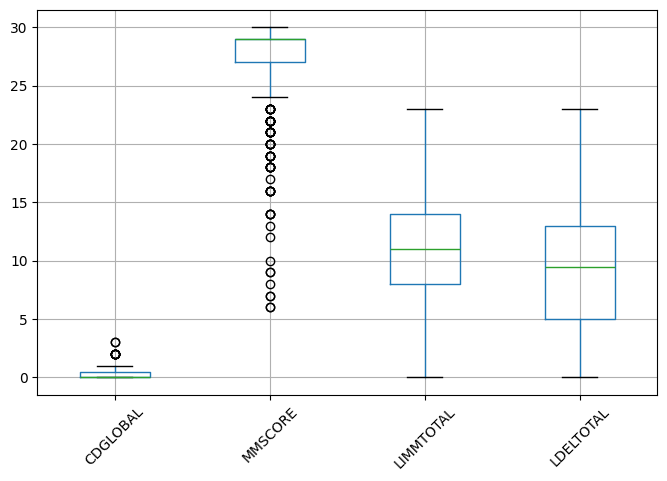

In [980]:
import matplotlib.pyplot as plt

df[clinical_features].boxplot(figsize=(8,5))
plt.xticks(rotation=45)
plt.show()


In [981]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[clinical_features])
y = df['DX']


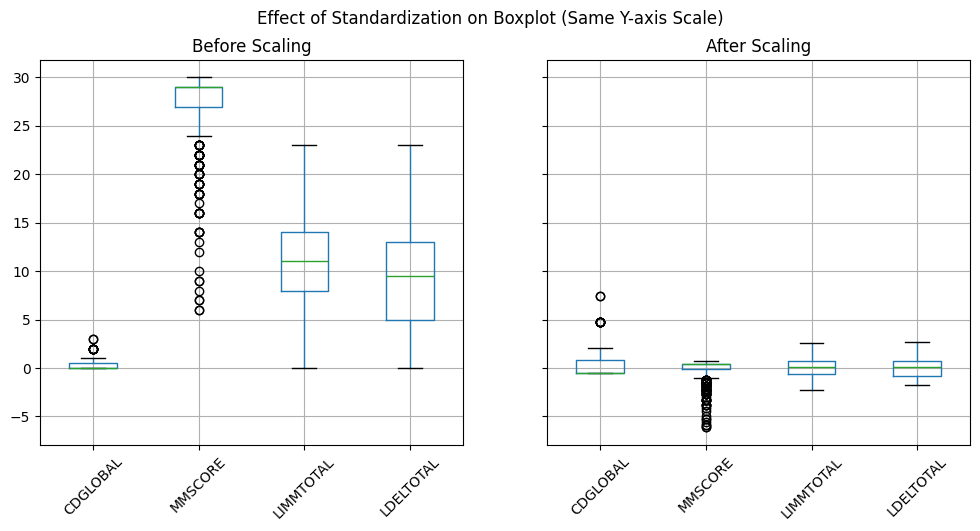

In [982]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)  

df[clinical_features].boxplot(ax=ax1)
ax1.set_title("Before Scaling")
ax1.tick_params(axis='x', rotation=45)

scaled = pd.DataFrame(scaler.fit_transform(df[clinical_features]), columns=clinical_features)
scaled.boxplot(ax=ax2)
ax2.set_title("After Scaling")
ax2.tick_params(axis='x', rotation=45)

plt.suptitle("Effect of Standardization on Boxplot (Same Y-axis Scale)")
plt.show()

In [983]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X = df[clinical_features]   
y = df['DX']

X_scaled = scaler.fit_transform(X)   

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9207317073170732


In [ ]:
importance = pd.DataFrame({
    'Feature': clinical_features,
    'Coefficient': model.coef_[0]
})
importance['Abs Importance'] = importance['Coefficient'].abs()
importance.sort_values('Abs Importance', ascending=False, inplace=True)

print(importance)


     Feature  Coefficient  Abs Importance
0   CDGLOBAL    -2.619017        2.619017
3  LDELTOTAL     1.015914        1.015914
1    MMSCORE     0.943818        0.943818
2  LIMMTOTAL     0.259231        0.259231


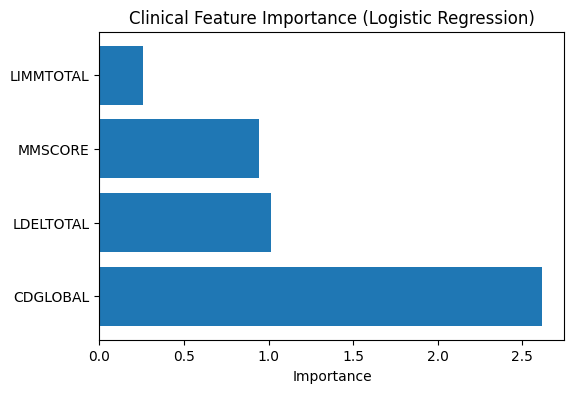

In [985]:
plt.figure(figsize=(6,4))
plt.barh(importance['Feature'], importance['Abs Importance'])
plt.xlabel("Importance")
plt.title("Clinical Feature Importance (Logistic Regression)")
plt.show()


In [986]:
df['PTGENDER'] = df['PTGENDER'].map({1: 0, 2: 1})


In [987]:
demographic_features = ['Age', 'PTGENDER']
target = 'DX'

X = df[demographic_features]
y = df[target]


In [988]:
df[demographic_features + ['DX']].head()


,Age,PTGENDER,DX
0,82,0,2
1,78,0,1
2,67,1,0
3,74,0,0
4,83,1,1


In [989]:
df[demographic_features].isna().sum()


Age         0
PTGENDER    0
dtype: int64

In [990]:
df[demographic_features].describe()


,Age,PTGENDER
count,820.000000,820.000000
mean,74.596341,0.550000
std,35.512081,0.497797
min,55.000000,0.000000
25%,68.000000,0.000000
50%,73.000000,1.000000
75%,78.000000,1.000000
max,1072.000000,1.000000


In [991]:
df = df[(df['Age'] >= 50) & (df['Age'] <= 100)]


In [992]:
demographic_features = ['Age', 'PTGENDER']
X = df[demographic_features]
y = df['DX']


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age']

X = df[['Age', 'PTGENDER']].copy()

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print(X.head())


        Age  PTGENDER
0  1.285850         0
1  0.689271         0
2 -0.951321         1
3  0.092692         0
4  1.434995         1


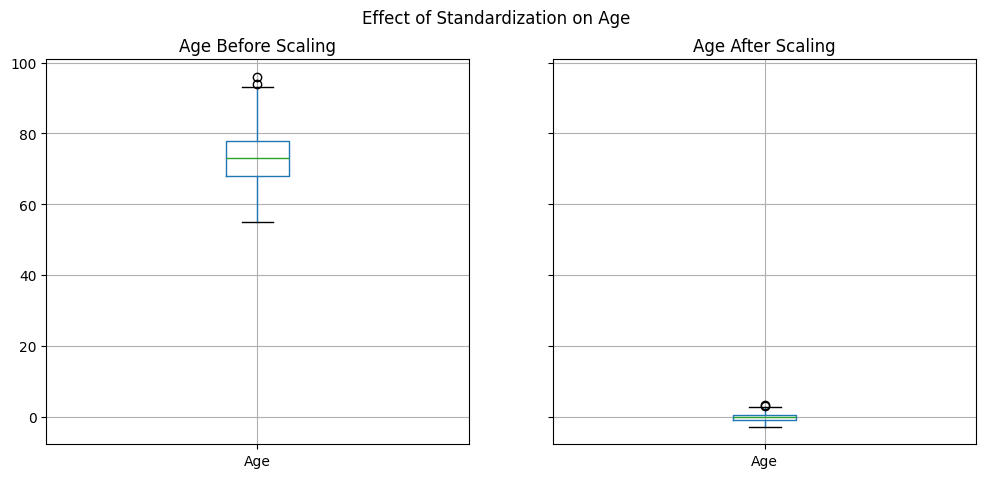

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

---df[['Age']].boxplot(ax=ax1)
ax1.set_title("Age Before Scaling")


scaled_df = X.copy()  
scaled_df[['Age']].boxplot(ax=ax2)
ax2.set_title("Age After Scaling")

plt.suptitle("Effect of Standardization on Age")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = X 
y = df['DX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.7195121951219512


In [998]:
importance = pd.DataFrame({
    'Feature': demographic_features,
    'Coefficient': model.coef_[0]
})
importance['Abs Importance'] = importance['Coefficient'].abs()
importance.sort_values('Abs Importance', ascending=False, inplace=True)

print(importance)


    Feature  Coefficient  Abs Importance
1  PTGENDER     0.189062        0.189062
0       Age    -0.178627        0.178627


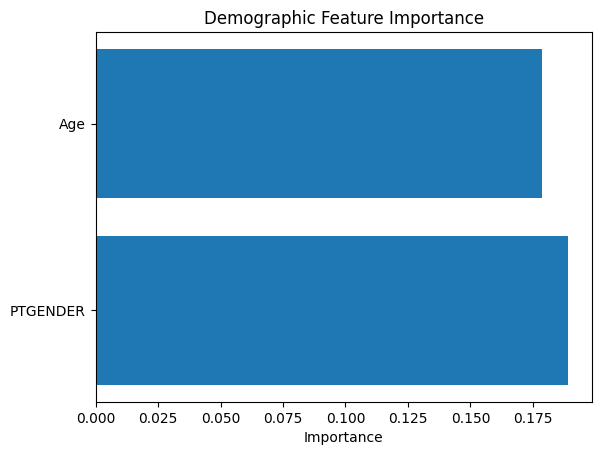

In [999]:
plt.barh(importance['Feature'], importance['Abs Importance'])
plt.xlabel("Importance")
plt.title("Demographic Feature Importance")
plt.show()


In [1000]:
genetic_features = ['APGEN1','APGEN2']
X = df[genetic_features]
y = df['DX']


In [1001]:
df[genetic_features + ['DX']]


,APGEN1,APGEN2,DX
0,4,4,2
1,4,3,1
2,4,3,0
3,3,3,0
4,3,2,1
...,...,...,...
815,3,3,0
816,3,3,0
817,3,3,1
818,3,3,2


In [1002]:
df[genetic_features].isna().sum()


APGEN1    0
APGEN2    0
dtype: int64

In [1003]:
df[genetic_features].describe()


,APGEN1,APGEN2
count,819.000000,819.000000
mean,3.351648,2.923077
std,0.482867,0.431285
min,2.000000,2.000000
25%,3.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,3.000000
max,4.000000,4.000000


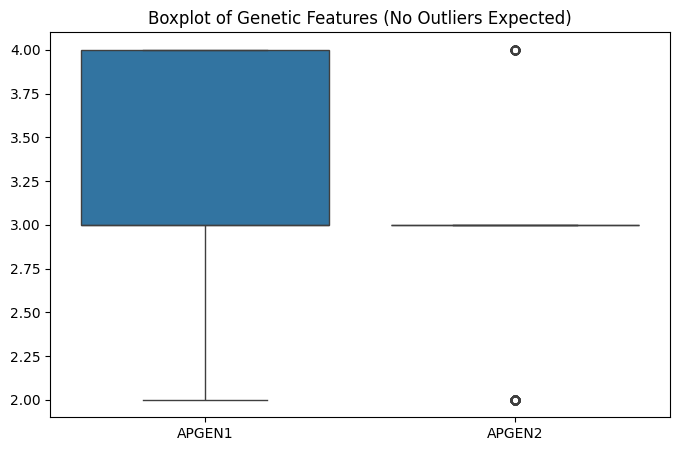

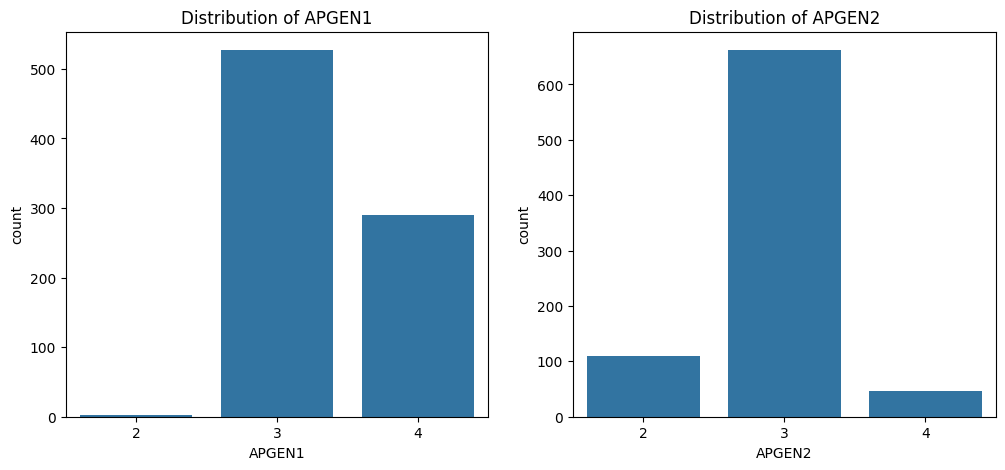

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genetic_features = ['APGEN1', 'APGEN2']

plt.figure(figsize=(8,5))
sns.boxplot(data=df[genetic_features])
plt.title("Boxplot of Genetic Features (No Outliers Expected)")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='APGEN1', data=df, ax=axes[0])
axes[0].set_title("Distribution of APGEN1")

sns.countplot(x='APGEN2', data=df, ax=axes[1])
axes[1].set_title("Distribution of APGEN2")

plt.show()


In [1005]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

genetic_features = ['APGEN1','APGEN2']
X = df[genetic_features]
y = df['DX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

importance = pd.DataFrame({
    'Feature': genetic_features,
    'Coefficient': model.coef_[0]
})
importance['Abs Importance'] = importance['Coefficient'].abs()
print(importance)


Accuracy: 0.7195121951219512
  Feature  Coefficient  Abs Importance
0  APGEN1    -0.666045        0.666045
1  APGEN2    -0.434914        0.434914


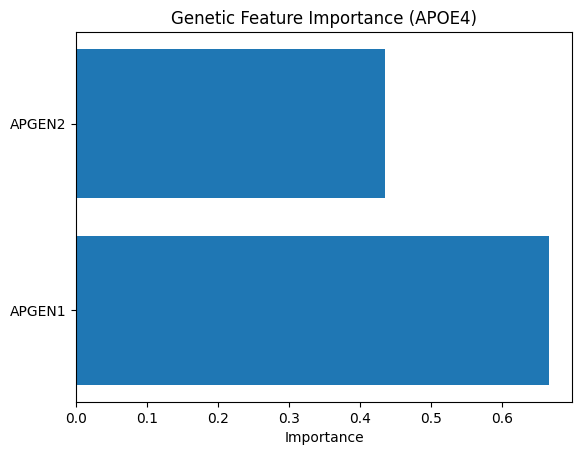

In [1006]:
plt.barh(importance['Feature'], importance['Abs Importance'])
plt.xlabel("Importance")
plt.title("Genetic Feature Importance (APOE4)")
plt.show()


In [1007]:
imaging_features = ['AXT117', 'BAT126',
    'HMT3', 'HMT7', 'HMT13', 'HMT40', 'HMT100', 'HMT102',
    'RCT6', 'RCT11', 'RCT20', 'RCT392']
X = df[imaging_features]
y = df['DX']

In [1008]:
df[imaging_features + ['DX']]


,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392,DX
0,6.99,345.619,4.29,4.8,164,15.0,34.9,35.1,33.639,126.112,158.526,1.131,2
1,1.51,585.520,4.42,3.2,250,15.0,33.9,34.8,21.625,86.477,154.660,0.905,1
2,2.84,838.974,3.92,5.1,226,12.9,32.9,34.1,29.434,91.882,228.124,0.679,0
3,2.01,521.817,4.15,5.0,258,13.7,33.1,34.3,33.038,90.080,146.927,1.131,0
4,3.59,290.049,4.23,6.9,269,13.5,32.0,34.5,39.646,82.874,193.325,1.142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.26,715.635,4.65,8.3,273,14.9,32.0,34.1,33.639,131.517,231.990,0.860,0
816,1.10,1240.164,4.45,10.5,269,13.8,31.0,33.9,46.855,88.278,112.128,1.131,0
817,1.40,474.380,4.25,5.2,245,12.7,29.8,34.3,32.438,88.278,216.524,0.690,1
818,0.97,393.057,4.55,6.2,314,14.9,32.7,34.7,31.837,86.477,228.124,1.075,2


In [1009]:
df[imaging_features].isna().sum()


AXT117    0
BAT126    0
HMT3      0
HMT7      0
HMT13     0
HMT40     0
HMT100    0
HMT102    0
RCT6      0
RCT11     0
RCT20     0
RCT392    0
dtype: int64

In [1010]:
df[imaging_features].describe()


,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,1.938203,466.702338,4.519853,5.918437,233.744811,14.077534,31.206593,34.082540,37.013781,92.442538,207.100863,0.858799
std,1.229031,241.391734,0.400659,1.527575,58.314924,1.162698,1.564734,0.618461,9.788450,14.922402,42.304767,0.191643
min,0.009000,116.562000,3.240000,2.200000,16.000000,9.500000,21.700000,31.600000,16.219000,46.842000,92.796000,0.226000
25%,1.190000,322.578000,4.270000,4.950000,195.000000,13.400000,30.400000,33.700000,30.636000,84.675000,177.859000,0.724000
50%,1.700000,412.032000,4.500000,5.700000,230.000000,14.000000,31.200000,34.100000,35.441000,90.080000,208.791000,0.826000
75%,2.410000,542.148000,4.780000,6.700000,267.000000,14.800000,32.100000,34.500000,42.049000,97.286000,231.990000,0.962000
max,12.660000,2033.056000,5.840000,14.500000,556.000000,18.100000,39.000000,36.000000,115.334000,234.208000,367.317000,1.923000


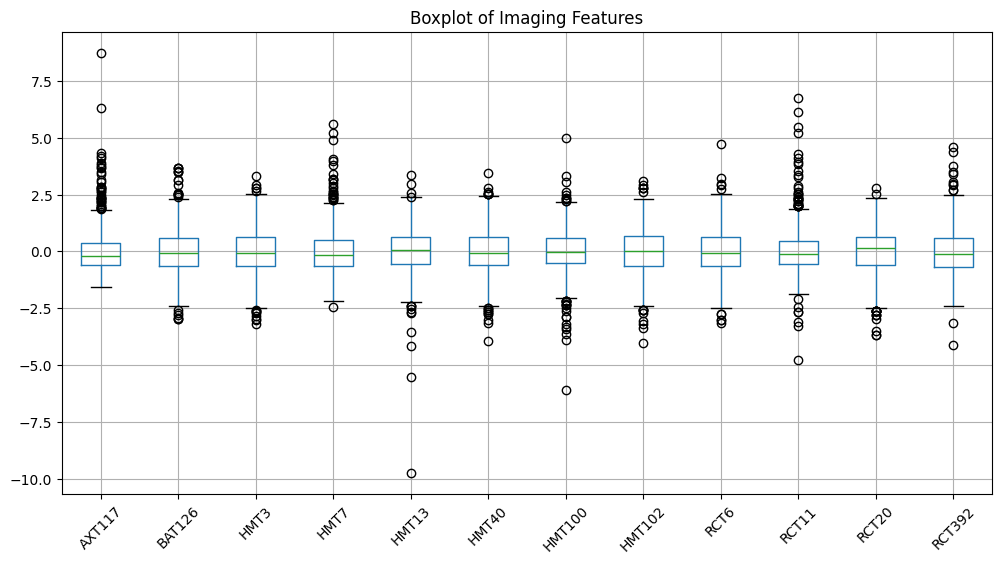

In [1011]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df_imaging_prepared.boxplot(rot=45)
plt.title("Boxplot of Imaging Features")
plt.show()


In [1012]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Copy data
imaging = df[['AXT117','BAT126','HMT3','HMT7','HMT13','HMT40',
              'HMT100','HMT102','RCT6','RCT11','RCT20','RCT392']].copy()

# 1) Log transform for skewed features
skewed_features = ['BAT126', 'HMT13', 'RCT6', 'RCT11', 'RCT20', 'RCT392']
for col in skewed_features:
    imaging[col] = np.log1p(imaging[col])   # log(x+1) safe for small values

# 2) Standardize
scaler = StandardScaler()
imaging_scaled = pd.DataFrame(scaler.fit_transform(imaging), columns=imaging.columns)

# Replace in main df for modeling
df_imaging_prepared = imaging_scaled.copy()


In [1013]:
X = df_imaging_prepared
y = df['DX']


In [1014]:
print("Before log transform (original BAT126):")
print(df['BAT126'].head())

print("\nAfter log transform (in df_imaging_prepared):")
print(df_imaging_prepared['BAT126'].head())


Before log transform (original BAT126):
0    345.619
1    585.520
2    838.974
3    521.817
4    290.049
Name: BAT126, dtype: float64

After log transform (in df_imaging_prepared):
0   -0.467556
1    0.757032
2    1.593238
3    0.489347
4   -0.874373
Name: BAT126, dtype: float64


In [1015]:
df_imaging_prepared.describe()


,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392
count,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02
mean,-1.735147e-17,1.158211e-15,-2.581031e-16,-7.764783e-16,-1.986743e-15,2.602721e-16,2.708998e-15,5.270509e-16,-8.610667e-16,-1.761174e-15,-4.021203e-15,9.543309e-17
std,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00
min,-1.570653e+00,-2.984946e+00,-3.196326e+00,-2.435696e+00,-9.733010e+00,-3.939399e+00,-6.079247e+00,-4.016512e+00,-3.144000e+00,-4.772803e+00,-3.668625e+00,-4.106310e+00
25%,-6.091462e-01,-6.277032e-01,-6.239879e-01,-6.343576e-01,-5.550562e-01,-5.830815e-01,-5.157978e-01,-6.189126e-01,-6.337496e-01,-5.536098e-01,-6.144173e-01,-7.011342e-01
50%,-1.939318e-01,-5.942477e-02,-4.958238e-02,-1.430834e-01,6.172361e-02,-6.672495e-02,-4.216331e-03,2.824912e-02,-5.022708e-02,-1.106078e-01,1.403579e-01,-1.269566e-01
75%,3.841119e-01,5.781685e-01,6.496939e-01,5.119489e-01,6.194401e-01,6.217504e-01,5.713129e-01,6.754108e-01,6.374789e-01,4.407688e-01,6.366381e-01,5.906237e-01
max,8.729109e+00,3.652336e+00,3.296954e+00,5.621201e+00,3.365723e+00,3.461711e+00,4.983703e+00,3.102267e+00,4.740025e+00,6.759441e+00,2.803521e+00,4.572726e+00


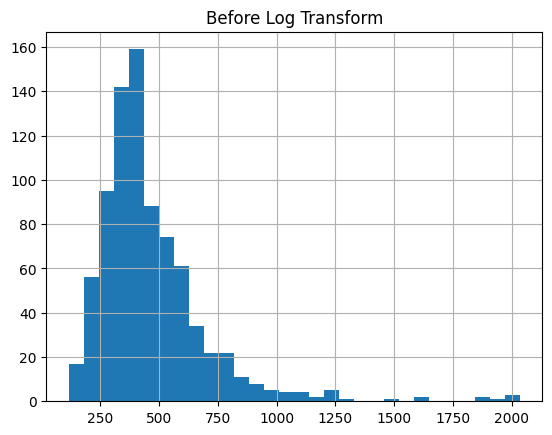

In [1016]:
df['BAT126'].hist(bins=30)
plt.title("Before Log Transform")
plt.show()


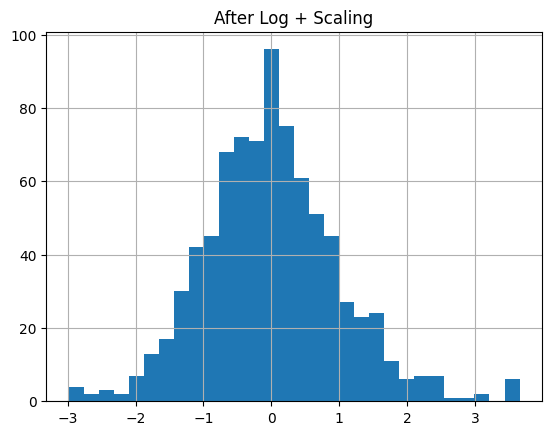

In [1017]:
df_imaging_prepared['BAT126'].hist(bins=30)
plt.title("After Log + Scaling")
plt.show()


In [1018]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

X = df_imaging_prepared  
y = df['DX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
importance['Abs Importance'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs Importance', ascending=False)

print(importance)


Accuracy: 0.7134146341463414
   Feature  Coefficient  Abs Importance
11  RCT392    -0.323157        0.323157
8     RCT6     0.227352        0.227352
2     HMT3     0.157273        0.157273
6   HMT100     0.133829        0.133829
3     HMT7    -0.120154        0.120154
5    HMT40    -0.116208        0.116208
10   RCT20    -0.085789        0.085789
7   HMT102     0.082158        0.082158
1   BAT126    -0.077167        0.077167
0   AXT117     0.061108        0.061108
9    RCT11    -0.055230        0.055230
4    HMT13    -0.028495        0.028495


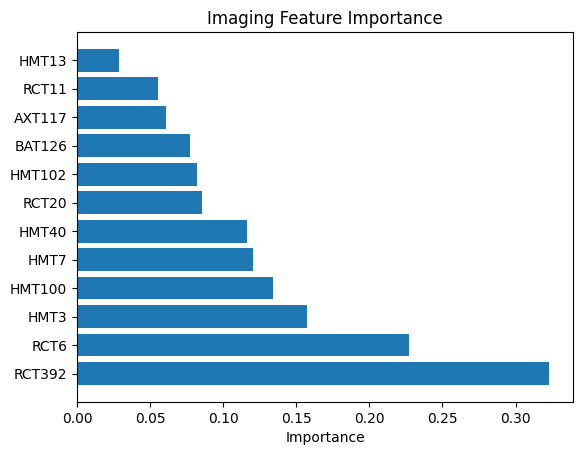

In [1019]:
plt.barh(importance['Feature'], importance['Abs Importance'])
plt.xlabel("Importance")
plt.title("Imaging Feature Importance")
plt.show()


In [1020]:
medical_features = ['MHPSYCH', 'MH2NEURL', 'MH4CARD', 'MH6HEPAT',
                    'MH8MUSCL', 'MH9ENDO', 'MH10GAST', 'MH12RENA',
                    'MH16SMOK', 'MH17MALI']

X = df[medical_features]
y = df['DX']


In [1021]:
df[medical_features + ['DX']]

,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH16SMOK,MH17MALI,DX
0,0,0,0,0,0,0,0,0,1,0,2
1,0,0,1,1,1,0,0,0,0,1,1
2,0,0,0,0,1,1,1,1,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
815,0,0,1,0,0,0,0,0,0,0,0
816,0,1,1,0,1,0,0,1,1,0,0
817,0,1,0,0,1,0,0,0,0,0,1
818,1,0,0,0,0,0,0,0,0,0,2


In [1022]:
df[medical_features].isna().sum()


MHPSYCH     0
MH2NEURL    0
MH4CARD     0
MH6HEPAT    0
MH8MUSCL    0
MH9ENDO     0
MH10GAST    0
MH12RENA    0
MH16SMOK    0
MH17MALI    0
dtype: int64

In [1023]:
df[medical_features].describe()


,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH16SMOK,MH17MALI
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,0.238095,0.134310,0.429792,0.040293,0.494505,0.173382,0.267399,0.051282,0.296703,0.167277
std,0.426178,0.341194,0.495349,0.196766,0.500275,0.378809,0.442873,0.220707,0.457084,0.373451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1024]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

medical_features = ['MHPSYCH', 'MH2NEURL', 'MH4CARD', 'MH6HEPAT',
                    'MH8MUSCL', 'MH9ENDO', 'MH10GAST', 'MH12RENA',
                    'MH16SMOK', 'MH17MALI']

X = df[medical_features]
y = df['DX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

importance['Abs Importance'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs Importance', ascending=False)

print(importance)


Accuracy: 0.7134146341463414
    Feature  Coefficient  Abs Importance
7  MH12RENA     0.594914        0.594914
1  MH2NEURL    -0.589310        0.589310
8  MH16SMOK    -0.460721        0.460721
4  MH8MUSCL     0.258917        0.258917
0   MHPSYCH    -0.258889        0.258889
5   MH9ENDO     0.243773        0.243773
3  MH6HEPAT    -0.171760        0.171760
2   MH4CARD    -0.130398        0.130398
9  MH17MALI     0.062314        0.062314
6  MH10GAST     0.040296        0.040296


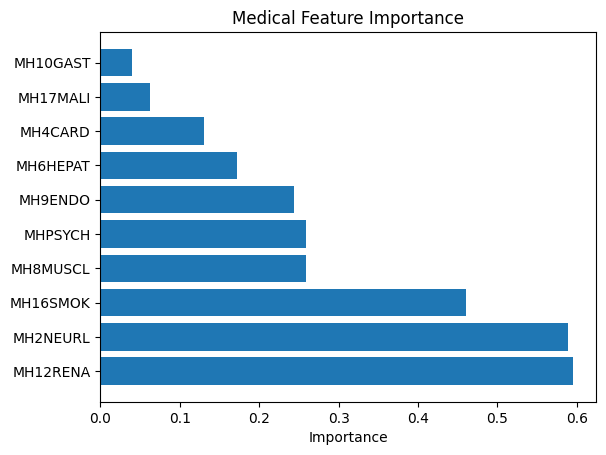

In [1025]:
plt.barh(importance['Feature'], importance['Abs Importance'])
plt.xlabel("Importance")
plt.title("Medical Feature Importance")
plt.show()

In [1026]:
selected_features = [
    'CDGLOBAL', 
    'Age' ,'PTGENDER',
    'APGEN1','APGEN2',
    'RCT392', 'RCT6','RCT20','HMT3','HMT40',
    'MH12RENA', 'MH2NEURL', 'MH16SMOK'
]

X = df[selected_features]
y = df['DX']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, weight=y_train.map({0:1.0, 1:4.47, 2:6.24}))
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softprob',   
    'num_class': 3,
    'learning_rate': 0.03,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss'
}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=30,
)

y_pred_prob = model.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[0]	train-mlogloss:1.06918	test-mlogloss:1.06124
[1]	train-mlogloss:1.04609	test-mlogloss:1.03331
[2]	train-mlogloss:1.01959	test-mlogloss:1.00162
[3]	train-mlogloss:0.99404	test-mlogloss:0.97070
[4]	train-mlogloss:0.97467	test-mlogloss:0.94691
[5]	train-mlogloss:0.95141	test-mlogloss:0.91912
[6]	train-mlogloss:0.92937	test-mlogloss:0.89338
[7]	train-mlogloss:0.91061	test-mlogloss:0.87216
[8]	train-mlogloss:0.89342	test-mlogloss:0.85152
[9]	train-mlogloss:0.87942	test-mlogloss:0.83828
[10]	train-mlogloss:0.85990	test-mlogloss:0.81542
[11]	train-mlogloss:0.84083	test-mlogloss:0.79306
[12]	train-mlogloss:0.82517	test-mlogloss:0.77528
[13]	train-mlogloss:0.81282	test-mlogloss:0.76321
[14]	train-mlogloss:0.80058	test-mlogloss:0.75085
[15]	train-mlogloss:0.79194	test-mlogloss:0.74445
[16]	train-mlogloss:0.78038	test-mlogloss:0.73278
[17]	train-mlogloss:0.76644	test-mlogloss:0.71817
[18]	train-mlogloss:0.75596	test-mlogloss:0.70763
[19]	train-mlogloss:0.74315	test-mlogloss:0.69265
[20]	train

✅ تم حفظ feature importances في ملف Excel


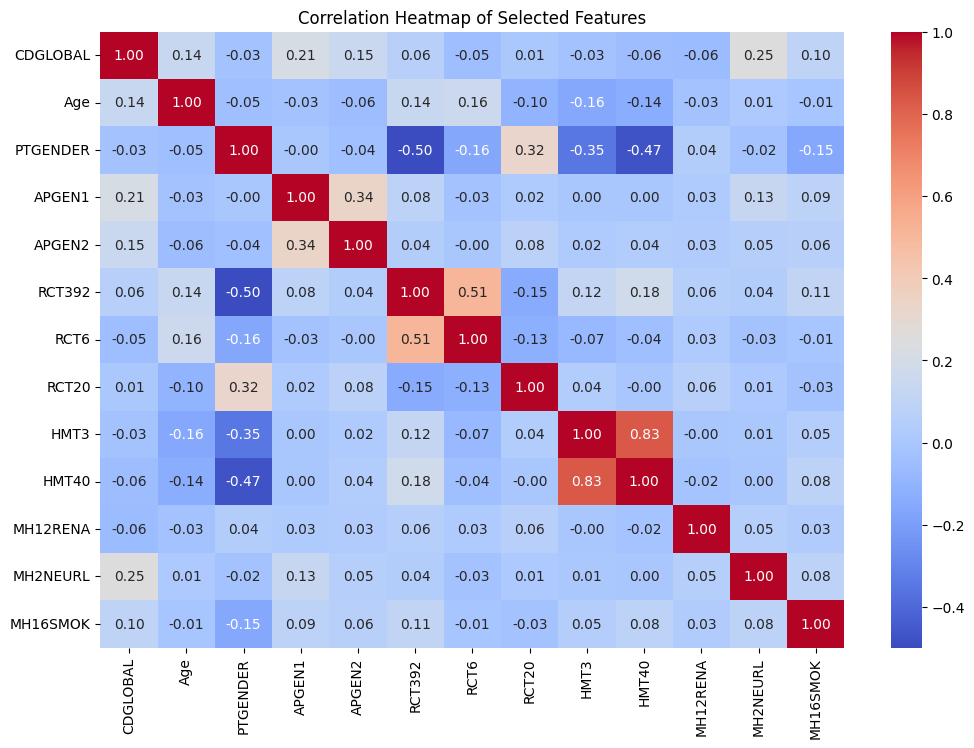

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clinical_features = ['CDGLOBAL']
demographic_features = ['Age', 'PTGENDER']
genetic_features = ['APGEN1', 'APGEN2']
imaging_features = ['RCT392', 'RCT6', 'RCT20', 'HMT3', 'HMT40']
medical_features = ['MH12RENA', 'MH2NEURL', 'MH16SMOK']

all_features = clinical_features + demographic_features + genetic_features + imaging_features + medical_features


importances = model.get_score(importance_type='weight')  

importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
})

importance_clinical = importance_df[importance_df['Feature'].isin(clinical_features)]
importance_demographic = importance_df[importance_df['Feature'].isin(demographic_features)]
importance_genetic = importance_df[importance_df['Feature'].isin(genetic_features)]
importance_imaging = importance_df[importance_df['Feature'].isin(imaging_features)]
importance_medical = importance_df[importance_df['Feature'].isin(medical_features)]

all_importances = pd.concat([
    importance_clinical,
    importance_demographic,
    importance_genetic,
    importance_imaging,
    importance_medical
], axis=0)

all_importances.to_excel("feature_importances.xlsx", index=False)
print(" تم حفظ feature importances في ملف Excel")


corr_df = df[all_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()
